In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt


In [250]:
import xml.etree.ElementTree as et
import time

In [276]:
xml_path = '../sample/7 January 2023 - Romme Alpin.gpx'

In [277]:
# read xml file
xtree = et.parse(xml_path)
xroot = xtree.getroot()

In [278]:
df = pd.DataFrame(columns=['trkseg', 'trkpt', 'lat', 'lon', 'ele', 'time', 'hdop', 'vdop', 'speed', 'azimuth'])

trkpt_vec = []

# Parse default namespace
namespace = get_namespace(xtree.getroot())

# Iterate all track segments
trkseg_n = 0 
for xsegment in xroot.findall('{0}trk/{0}trkseg'.format(namespace)) : 
    trkseg_n += 1

    # Iterate all track points
    trkpt_n = 0
    for xpoint in xsegment.findall('{0}trkpt'.format(namespace)) :
        trkpt_n += 1

        # Create a dictionary with all track point data
        trkpt = {'trkseg': trkseg_n, 'trkpt': trkpt_n}
        for xitem in xpoint.iter() :
            tag = xitem.tag.split('}')[-1]
            match tag:
                case "trkpt" : 
                    trkpt['lat'] = float(xitem.attrib['lat'])
                    trkpt['lon'] = float(xitem.attrib['lon'])
                case "ele" : 
                    trkpt['ele'] = float(xitem.text)
                case "time" : 
                    trkpt['time_stamp'] = xitem.text
                    trkpt['time'] = time.mktime(time.strptime(xitem.text, "%Y-%m-%dT%H:%M:%S%z"))
                case "hdop" : 
                    trkpt['hdop'] = float(xitem.text)
                case "vdop" : 
                    trkpt['vdop'] = float(xitem.text)
                case "gps" : 
                    trkpt['speed'] = float(xitem.attrib['speed'])
                    trkpt['azimuth'] = float(xitem.attrib['azimuth'])
                case _: continue
        
        # Add track point to list
        trkpt_vec.append(trkpt)

# Create a dataframe from the list of track points
df = pd.DataFrame(trkpt_vec)

df           
    

Namespace: {http://www.topografix.com/GPX/1/1}


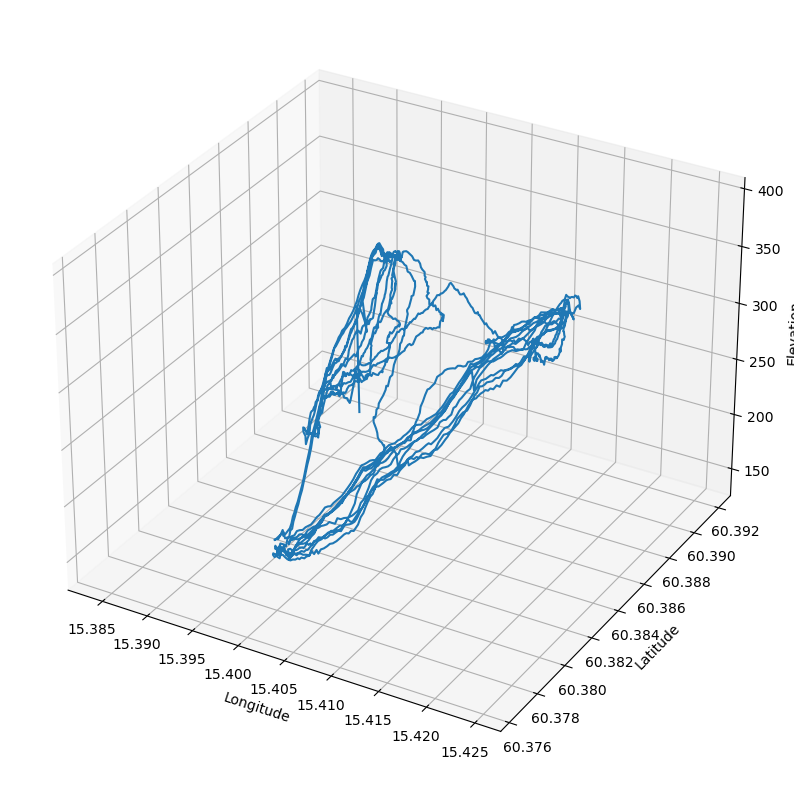

In [284]:
# Plot lat lon and elevation in 3D
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot(df['lon'], df['lat'], df['ele'])
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Elevation')
plt.show()

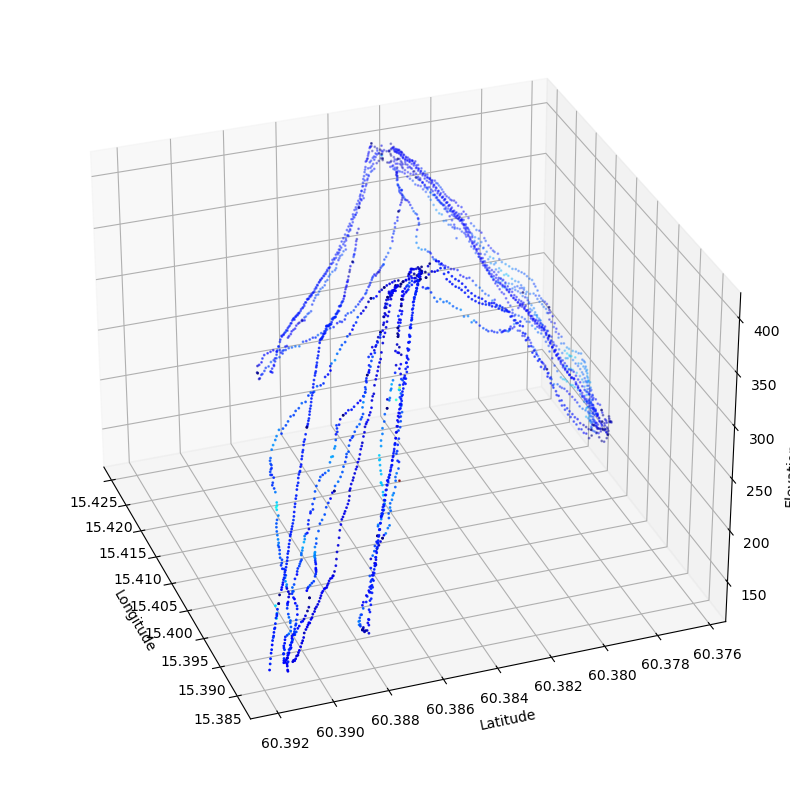

In [322]:
# Plot lat lon and elevation in 3D with speed as color from green to red and small point rotated 90 degrees
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['lon'], df['lat'], df['ele'], c=df['speed'], cmap='jet', s=1)
ax.view_init(30, -200)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Elevation')
plt.show()



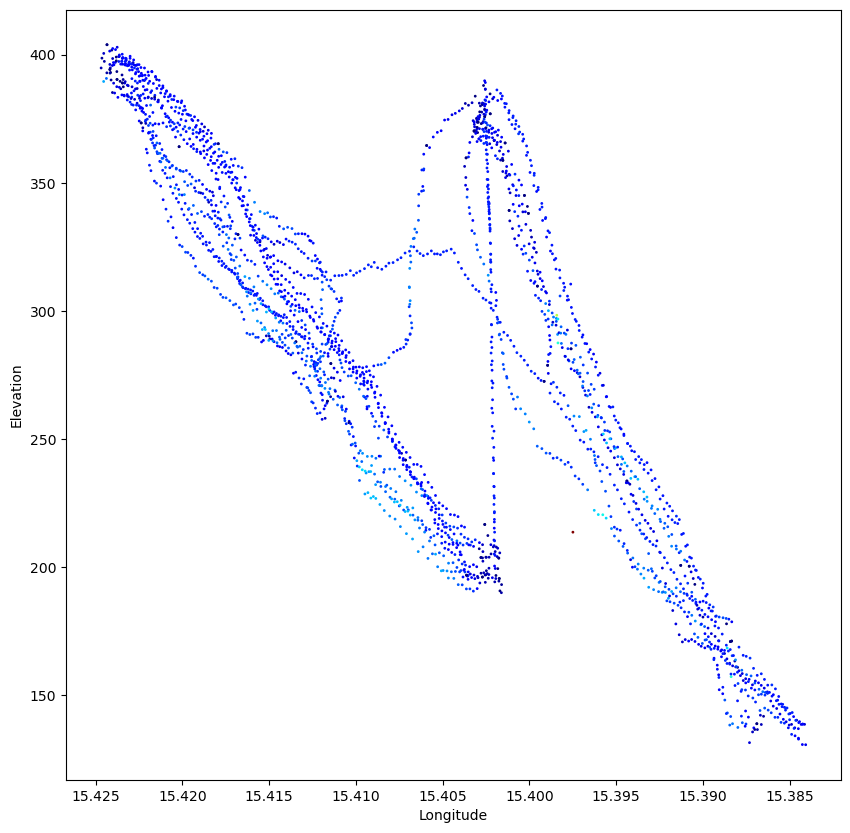

In [339]:
# Plot lat  and elevation in 2D with speed as color from green to red and small point rotated 90 degrees
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.scatter(df['lon'], df['ele'], c=df['speed'], cmap='jet', s=1)
ax.invert_xaxis()
ax.set_xlabel('Longitude')
ax.set_ylabel('Elevation')
plt.show()